In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
 df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


***************************************************
Now check missing or null valuess


In [6]:
  df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Now to find out how old is a car: we'll do 2021-year

In [8]:
finaldataset=df.drop(['Car_Name'],axis=1)

In [9]:
finaldataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
finaldataset['current_year']=2021

In [11]:
finaldataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [12]:
finaldataset['car_years']=finaldataset['current_year']-finaldataset['Year']

In [13]:
finaldataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,car_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [14]:
finaldataset.drop(['Year'],axis=1,inplace=True)

In [15]:
finaldataset.drop(['current_year'],axis=1,inplace=True)

In [16]:
finaldataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
finaldataset=pd.get_dummies(finaldataset,drop_first=True)

In [18]:
finaldataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Now convert categorical features into

In [19]:
finaldataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
car_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


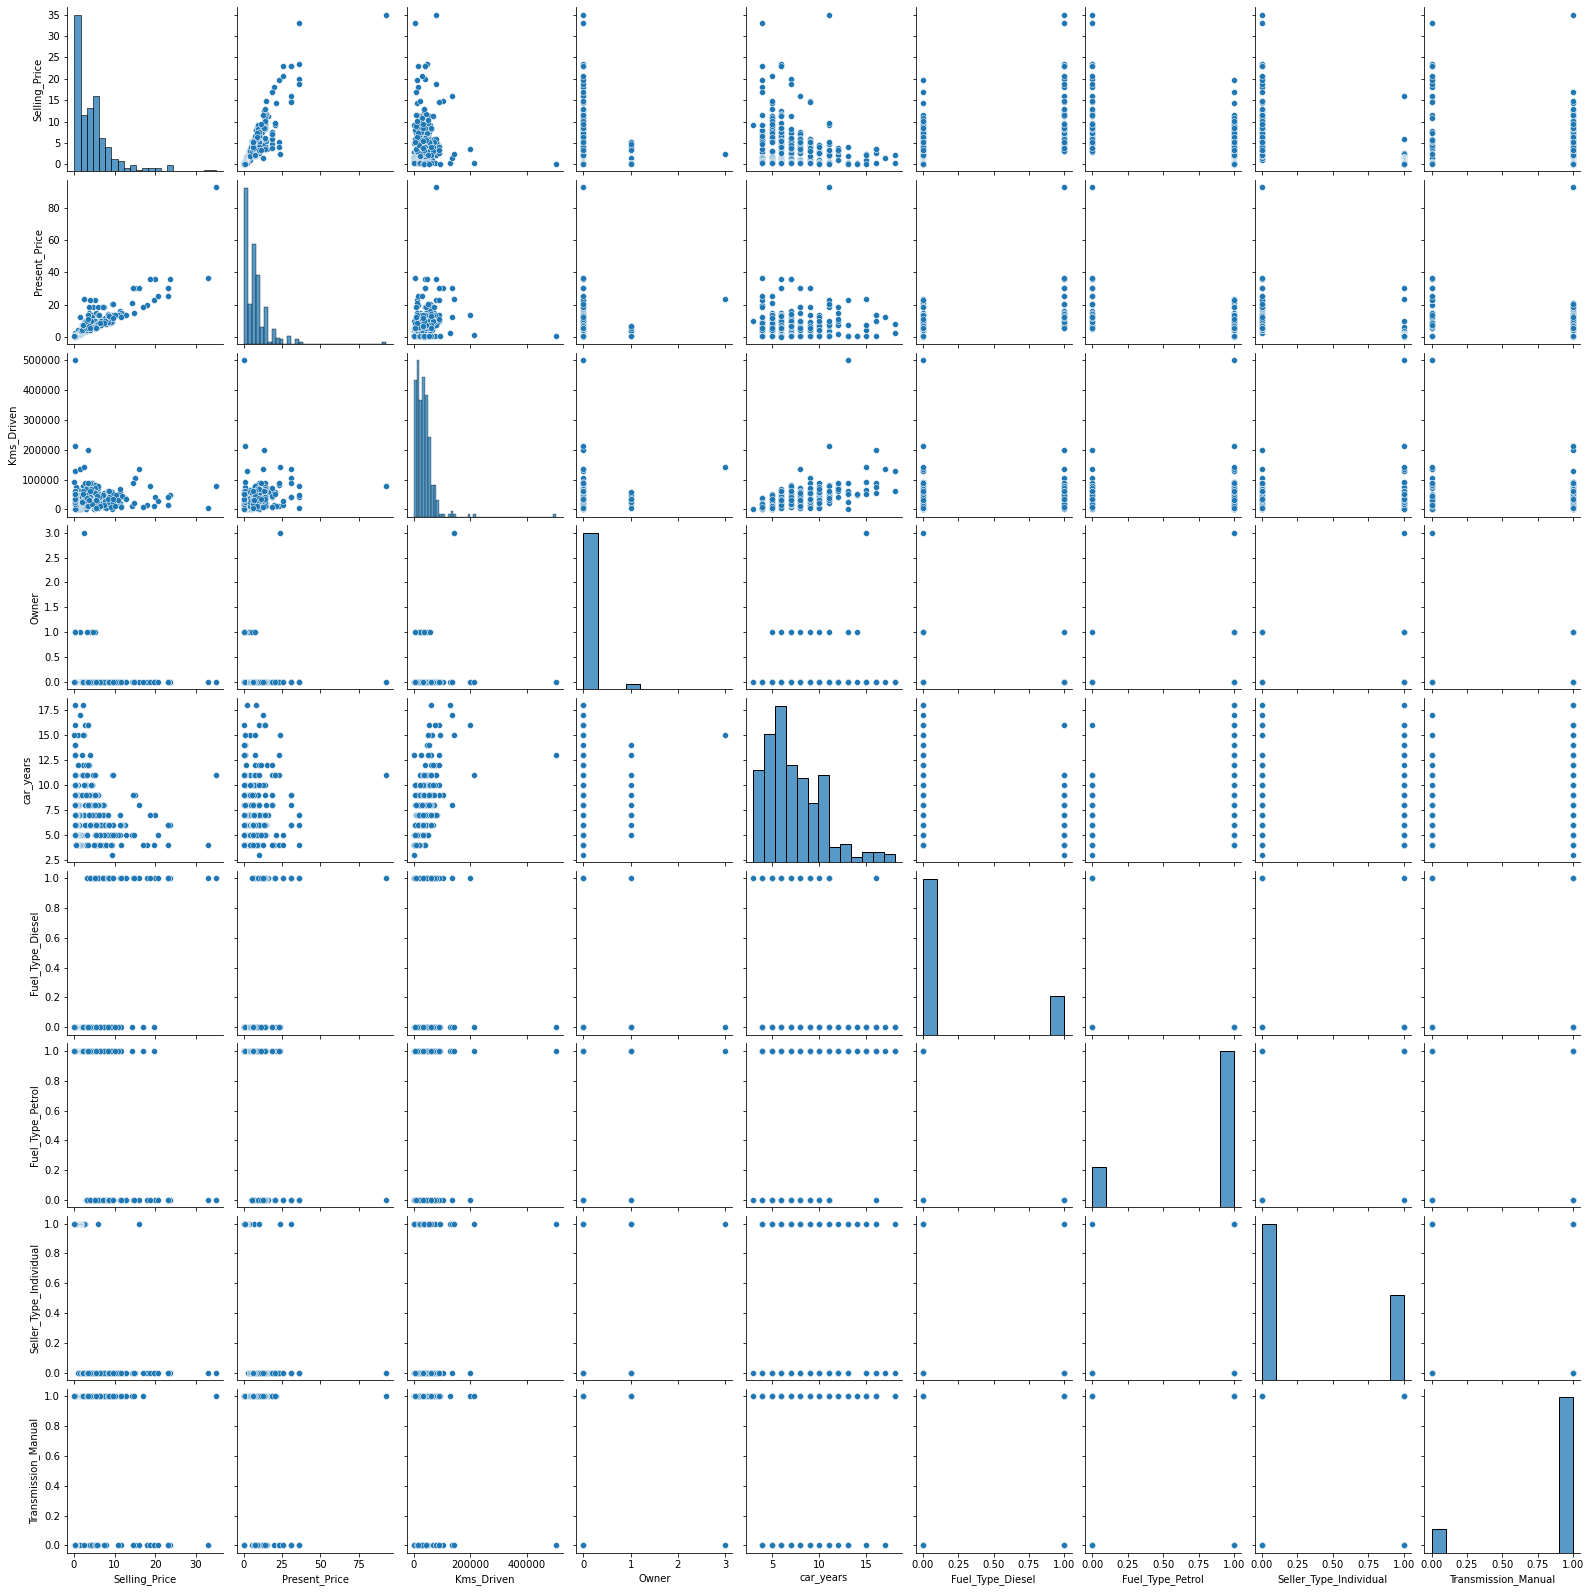

In [20]:
 sns.pairplot(finaldataset)

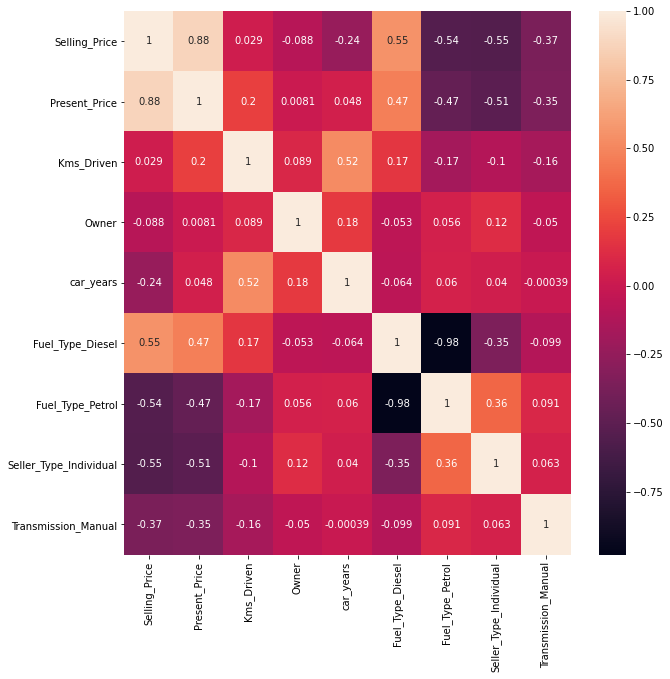

In [21]:
corrmat=finaldataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(finaldataset[top_corr_features].corr(),annot=True)

In [22]:
X=finaldataset.drop('Selling_Price',axis=1) #independant feature
y=finaldataset['Selling_Price'] #dependent features

In [23]:
X.head()

,Present_Price,Kms_Driven,Owner,car_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [24]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

feature importance

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.36535415 0.04127535 0.00050134 0.07494629 0.2341415  0.00845112
 0.12707272 0.14825754]


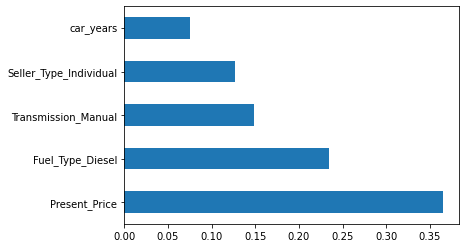

In [27]:
#plot graph of feature importances for better visualization 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) 
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
print(n_estimators)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

[100, 320, 540, 760, 980, 1200]


In [32]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 320, 540, 760, 980, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [34]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [35]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   2.1s
[CV] n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.6s
[CV] n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.7s
[CV] n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=980, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   1.8s
[CV] n_estimators=540, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=540, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   0.8s
[CV] n_estimators=540, min_samples_split=15

[CV]  n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   1.6s
[CV] n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.7s
[CV] n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   1.3s
[CV] n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=540, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=30, total=   1.3s
[CV] n_estimators=100, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:

rf_random.best_params_

{'n_estimators': 540,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [37]:
rf_random.best_score_

-3.577572116685694

In [52]:
rf_random.score(X_test,y_test)

-1.7348854356521943

In [38]:
predictions=rf_random.predict(X_test)

C:\Users\Sayali B Kshirsagar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

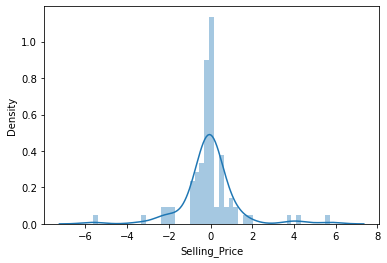

In [39]:
sns.distplot(y_test-predictions)

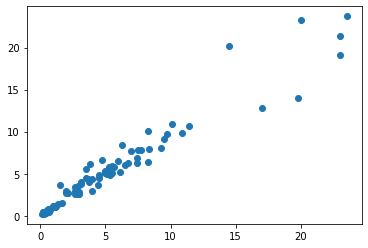

In [40]:
plt.scatter(y_test,predictions)

In [41]:
from sklearn import metrics

In [42]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7196889552224118
MSE: 1.7348854356521943
RMSE: 1.3171504984823088


In [55]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)